# pip & import

In [1]:
!pip install micropip

In [2]:
!pip install matplotlib-venn

In [3]:
!rm -rf ~/.cache/matplotlib
!sudo apt-get install fonts-nanum
!sudo fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
#hiddencell
import micropip
await micropip.install("seaborn")

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [6]:
plt.rc('font', family='NanumBarunGothic')
# 한글 폰트 사용 시 마이너스 폰트 깨짐 방지
plt.rc('axes', unicode_minus=False)

In [7]:
import os
import random
import numpy as np
import pandas as pd

# **서울시 평균 기온 예측 해커톤**

## seed 고정 & 함수 정의


In [8]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

## **데이터 불러오기 및 상위행 확인**  

train.csv, test.csv 파일을 로드하여 상위행을 출력해 봅시다

In [9]:
train_org = pd.read_csv('train.csv')

In [10]:
train_eda = train_org.copy()

## EDA

In [11]:
train_eda.columns

Index(['일시', '최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율',
       '평균기온'],
      dtype='object')

In [12]:
for col in train_eda.columns:
  print(train_eda[col].value_counts())

1960-01-01    1
2001-12-17    1
2002-01-06    1
2002-01-05    1
2002-01-04    1
             ..
1980-12-29    1
1980-12-28    1
1980-12-27    1
1980-12-26    1
2022-12-31    1
Name: 일시, Length: 23011, dtype: int64
 29.0    133
 28.2    131
 27.0    130
 27.2    124
 27.8    118
        ... 
-9.4       1
 37.1      1
 38.4      1
 38.2      1
-11.2      1
Name: 최고기온, Length: 490, dtype: int64
 19.2    113
 19.6    105
 18.8     98
 19.8     97
 19.0     97
        ... 
 28.8      1
-18.5      1
-14.7      1
-19.2      1
-17.2      1
Name: 최저기온, Length: 473, dtype: int64
9.0     334
9.2     327
9.3     326
8.7     319
8.0     314
       ... 
17.7      2
17.5      2
19.6      1
19.1      1
18.5      1
Name: 일교차, Length: 174, dtype: int64
0.0     2263
0.1      396
0.5      340
0.2      293
0.3      218
        ... 
19.9       1
49.8       1
74.3       1
32.4       1
57.9       1
Name: 강수량, Length: 771, dtype: int64
68.5    136
68.3    135
67.3    133
61.5    129
65.0    127
       ... 
69.

<Axes: xlabel='피해운전자 연령', ylabel='ECLO'>

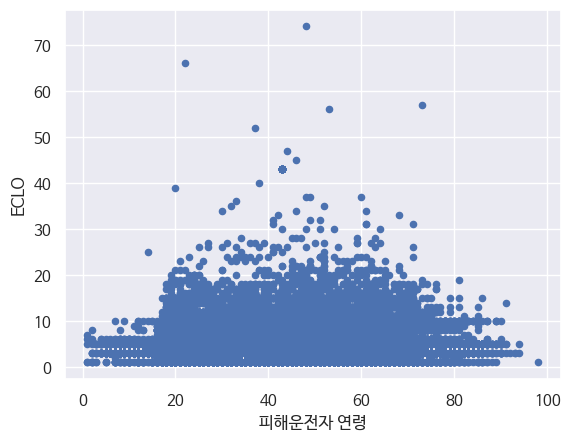

In [ ]:
train_eda.plot(kind='scatter', x='피해운전자 연령', y='ECLO')

In [13]:
train_eda.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [14]:
train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [17]:
train_eda.columns

Index(['일시', '최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율',
       '평균기온'],
      dtype='object')

In [18]:
train_eda = train_eda.fillna(0)

In [19]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(train_eda.dtypes[train_eda.dtypes == "object"].index)
# 추출된 문자열 변수 확인
display(categorical_features)

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_eda[i])
    train_eda[i]=le.transform(train_eda[i])


display(train_eda.head())

['일시']

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,0,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,0.0,0.0,-1.6
1,1,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,0.0,0.0,-1.9
2,2,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,0.0,0.0,4.0
3,3,10.8,1.2,9.6,0.0,79.7,4.4,2.6,0.0,0.0,7.5
4,4,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,0.0,0.0,-4.6


In [20]:
train_eda_number = train_eda.select_dtypes(include=np.number)
train_eda_tmp = train_eda_number
train_eda_number.columns

Index(['일시', '최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율',
       '평균기온'],
      dtype='object')

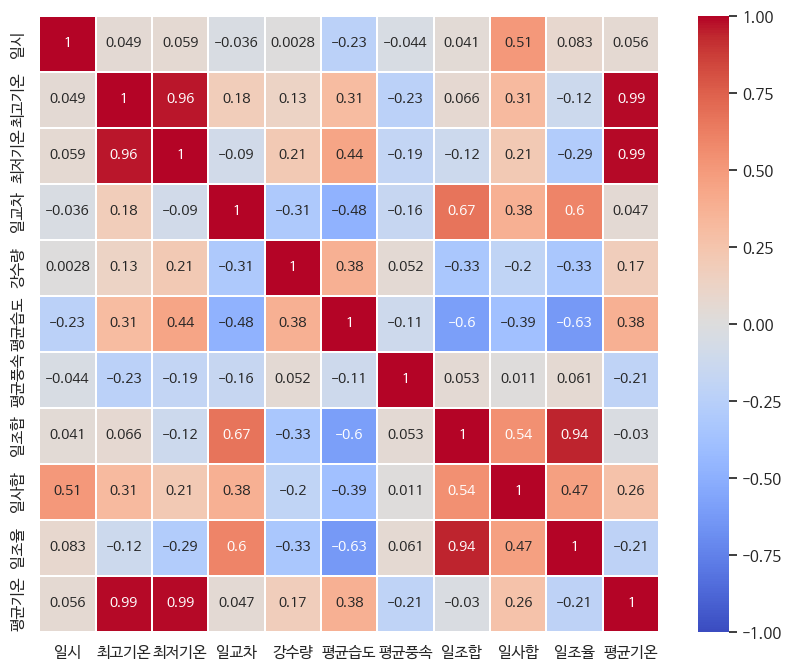

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 나눔 바른고딕 폰트 설정
sns.set(font="NanumBarunGothic")

# 그래프의 기본 폰트 설정
plt.rcParams["font.family"] = 'NanumBarunGothic'

# 히트맵 생성 코드
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(train_eda_tmp.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='coolwarm')

# 각 셀의 텍스트에 대한 폰트 설정
for text in heatmap.texts:
    text.set_fontsize(10)  # 폰트 크기를 원하는 크기로 조절하세요

# 플롯 보여주기
plt.show()

In [24]:
train_org["일시"]

0        1960-01-01
1        1960-01-02
2        1960-01-03
3        1960-01-04
4        1960-01-05
            ...    
23006    2022-12-27
23007    2022-12-28
23008    2022-12-29
23009    2022-12-30
23010    2022-12-31
Name: 일시, Length: 23011, dtype: object

In [27]:
palette = sns.color_palette("pastel")
sns.set_palette(palette=palette)

In [28]:
train_org.columns

Index(['일시', '최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율',
       '평균기온'],
      dtype='object')